# Board games recommender system

### Imports and data loading

In [1]:
%pip install opencv-python

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os

# Function to read image urls
import urllib
import cv2

Note: you may need to restart the kernel to use updated packages.


c:\Users\pauli\projects\test-cline\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
path = kagglehub.dataset_download("mshepherd/board-games")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\pauli\.cache\kagglehub\datasets\mshepherd\board-games\versions\13


In [3]:
csv_path = os.path.join(path, "bgg_GameItem.csv")
df = pd.read_csv(csv_path)
df.head(5)

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,5497,1,"12517,4959","133,2,24883,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,...,1.57510,7.06367,4.3144,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,...,1.46752,5.76599,1.9636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,...,1.19279,7.22869,2.4784,1.006579,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,5497,8008,2277,37,2.0,4.0,2.0,...,1.23667,5.66660,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,28072,5392,4668,38,462...",2.0,6.0,3.0,...,1.33603,7.12541,2.4985,1.095890,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print('Number of records: ', df['bgg_id'].count())

Number of records:  113904


In [5]:
print('Null ids: ', df['bgg_id'].isna().sum())

Null ids:  0


In [6]:
df.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

In [7]:
csv_path = os.path.join(path, "bgg_Category.csv")
df_bgg_Category = pd.read_csv(csv_path)
df_bgg_Category.head(5)

,bgg_id,name
0,1001,Political
1,1002,Card Game
2,1008,Nautical
3,1009,Abstract Strategy
4,1010,Fantasy


In [8]:
csv_path = os.path.join(path, "bgg_GameFamily.csv")
df_bgg_GameFamily = pd.read_csv(csv_path)
df_bgg_GameFamily.head(5)

,bgg_id,name
0,1,Admin: Test Family
1,2,Game: Carcassonne
2,3,Game: Catan
3,4,Series: The Chicken Family of Zoch
4,5,Game: Bohnanza


In [9]:
csv_path = os.path.join(path, "bgg_GameType.csv")
df_bgg_GameType = pd.read_csv(csv_path)
df_bgg_GameType.head(5)

,bgg_id,name
0,4415,Amiga
1,4420,Commodore 64
2,4664,War Game
3,4665,Children's Game
4,4666,Abstract Game


In [10]:
csv_path = os.path.join(path, "bgg_Mechanic.csv")
df_bgg_Mechanic = pd.read_csv(csv_path)
df_bgg_Mechanic.head(5)

,bgg_id,name
0,2001,Action Points
1,2002,Tile Placement
2,2003,Rock-Paper-Scissors
3,2004,Set Collection
4,2005,Stock Holding


In [11]:
csv_path = os.path.join(path, "bgg_Person.csv")
df_bgg_Person = pd.read_csv(csv_path)
df_bgg_Person.head(5)

,bgg_id,name
0,1,Karl-Heinz Schmiel
1,2,Reiner Knizia
2,3,(Uncredited)
3,4,Sid Sackson
4,5,Jean du Poël


In [12]:
csv_path = os.path.join(path, "bgg_Publisher.csv")
df_bgg_Publisher = pd.read_csv(csv_path)
df_bgg_Publisher.head(5)

,bgg_id,name
0,2,Moskito Spiele
1,3,Rio Grande Games
2,4,(Self-Published)
3,5,The Avalon Hill Game Co
4,6,Historien Spiele Galerie (Historien Spielegale...


In [13]:
df_bgg_Image_Description = pd.read_csv("scrapped_data/scrapped_images_and_descriptions.csv")

In [14]:
# Filling missing values in image column with a default image URL

default_image = 'https://static.vecteezy.com/system/resources/thumbnails/004/141/669/small_2x/no-photo-or-blank-image-icon-loading-images-or-missing-image-mark-image-not-available-or-image-coming-soon-sign-simple-nature-silhouette-in-frame-isolated-illustration-vector.jpg'

df_bgg_Image = df_bgg_Image_Description[['bgg_id', 'image']]
df_bgg_Image = df_bgg_Image.rename(columns={'image': 'name'})

df_bgg_Image['name'] = df_bgg_Image['name'].fillna(default_image)
df_bgg_Image['name'] = df_bgg_Image['name'].replace('', default_image)

df_bgg_Image.head(3)

,bgg_id,name
0,1,https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...
1,2,https://cf.geekdo-images.com/oQYhaJx5Lg3KcGis2...
2,3,https://cf.geekdo-images.com/o9-sNXmFS_TLAb7Zl...


In [15]:
default_description = 'No description available'

df_bgg_Description = df_bgg_Image_Description[['bgg_id', 'description']]
df_bgg_Description = df_bgg_Description.rename(columns={'description': 'name'})

df_bgg_Description['name'] = df_bgg_Description['name'].fillna(default_description)
df_bgg_Description['name'] = df_bgg_Description['name'].replace('', default_description)

df_bgg_Description.head(3)

,bgg_id,name
0,1,Die Macher is a game about seven sequential po...
1,2,Dragonmaster is a trick-taking card game based...
2,3,Samurai is set in medieval Japan. Players comp...


### BGG Data Columns Description

| Column | Description |
|--------|-------------|
| `bgg_id` | Unique game identifier in BGG database. |
| `name` | Game name (primary). |
| `year` | Game publication year. |
| `game_type` | Game type (board game, expansion, etc.). From main element. |
| `designer` | Game designer(s). |
| `artist` | Artist(s) responsible for artwork. |
| `publisher` | Game publisher. |
| `min_players` | Minimum number of players. |
| `max_players` | Maximum number of players. |
| `min_players_rec` | Minimum recommended number of players. From user polls. |
| `max_players_rec` | Maximum recommended number of players. From user polls. |
| `min_players_best` | Minimum number of players for best experience. From polls - "Best" votes. |
| `max_players_best` | Maximum number of players for best experience. From polls - "Best" votes. |
| `min_age` | Official minimum player age. |
| `min_age_rec` | Community recommended minimum age. From polls. |
| `min_time` | Minimum game time (minutes). |
| `max_time` | Maximum game time (minutes). |
| `category` | Game category. |
| `mechanic` | Game mechanics. |
| `cooperative` | Whether the game is cooperative. Probably boolean flag based on mechanics. |
| `compilation` | Whether the game is a compilation of other games. Based on tags or special designations. |
| `compilation_of` | Which games it is a compilation of. Details from game relationships. |
| `family` | Game family it belongs to. |
| `implementation` | Game implementations (digital, other versions). |
| `integration` | Integrations with other games. Relationships between games in BGG system. |
| `rank` | Position in BGG ranking. Data from separate API endpoint (not visible in this XML). |
| `num_votes` | Number of votes/ratings. From statistical data (not in this XML). |
| `avg_rating` | Average rating. From BGG statistical data. |
| `stddev_rating` | Standard deviation of ratings. From BGG statistical data. |
| `bayes_rating` | Bayesian rating (considers number of votes). Used for BGG rankings. |
| `complexity` | Game complexity level (1-5). From separate user polls. |
| `language_dependency` | Language dependency (1-5).<br>**1**: No text in the game<br>**2**: Little text - easy to memorize<br>**3**: Moderate text - cheat sheet needed<br>**4**: Lots of text - translation required<br>**5**: Unplayable in other language |
| `image` | Game image URL. |
| `description` | Game description. |

In [16]:
# Create dictionaries with string keys (to match the JSON parsing approach)
def create_string_key_dict(df, key_col, value_col):
    return {str(k).strip(): str(v).strip() for k, v in df.set_index(key_col)[value_col].to_dict().items()}


game_type_dict = create_string_key_dict(df_bgg_GameType, 'bgg_id', 'name')
designer_dict = create_string_key_dict(df_bgg_Person, 'bgg_id', 'name')
artist_dict = create_string_key_dict(df_bgg_Person, 'bgg_id', 'name')
publisher_dict = create_string_key_dict(df_bgg_Publisher, 'bgg_id', 'name')
category_dict = create_string_key_dict(df_bgg_Category, 'bgg_id', 'name')
mechanic_dict = create_string_key_dict(df_bgg_Mechanic, 'bgg_id', 'name')
images_dict = {k: str(v).strip() for k, v in df_bgg_Image.set_index('bgg_id')['name'].to_dict().items()}
descriptions_dict = create_string_key_dict(df_bgg_Description, 'bgg_id', 'name')

In [17]:
ref_dicts = {'game_types': game_type_dict,
            'designers': designer_dict,
            'artists': artist_dict,
            'publishers': publisher_dict,
            'categories': category_dict,
            'mechanics': mechanic_dict,
            'images': images_dict,
            'descriptions': descriptions_dict
            }

In [18]:
# Check game types for this board game
game_types = df.loc[df['name']=='Gloomhaven', 'game_type'].values
game_types = game_types[0].split(',')
print('Game Types\n------------')
for type_id in game_types:
    print(game_type_dict[type_id])

Game Types
------------
Thematic
Strategy Game


In [19]:
# Check categories for this board game
categories = df.loc[df['name']=='Gloomhaven', 'category'].values
categories = categories[0].split(',')
print('Categories\n------------')
for c_id in categories:
    print(category_dict[c_id])

Categories
------------
Adventure
Exploration
Fantasy
Fighting
Miniatures


In [20]:
# Check mechanics for this board game
mechanics = df.loc[df['name']=='Gloomhaven', 'mechanic'].values
mechanics = mechanics[0].split(',')
print('Mechanics\n------------')
for c_id in mechanics:
    print(mechanic_dict[c_id])

Mechanics
------------
Action Queue
Action Retrieval
Campaign / Battle Card Driven
Card Play Conflict Resolution
Communication Limits
Cooperative Game
Critical Hits and Failures
Deck Construction
Grid Movement
Hand Management
Hexagon Grid
Legacy Game
Line of Sight
Modular Board
Once-Per-Game Abilities
Role Playing
Scenario / Mission / Campaign Game
Simultaneous Action Selection
Solo / Solitaire Game
Tags
Variable Player Powers


In [21]:
# Check images for this board game
game_id = df.loc[df['name'] == 'Gloomhaven', 'bgg_id'].values[0]

print("Images\n------------")
if game_id in images_dict:
    print(images_dict[game_id])
else:
    print("No image available")

Images
------------
https://static.vecteezy.com/system/resources/thumbnails/004/141/669/small_2x/no-photo-or-blank-image-icon-loading-images-or-missing-image-mark-image-not-available-or-image-coming-soon-sign-simple-nature-silhouette-in-frame-isolated-illustration-vector.jpg


In [22]:
# Check description for this board game
game_id = df.loc[df['name'] == 'Gloomhaven', 'bgg_id'].values[0]

print("Description\n------------")
if game_id in descriptions_dict:
    print(descriptions_dict[game_id])
else:
    print("No description available")

Description
------------
No description available


### Cleaning

In [23]:
df.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

#### We only want bgg data so we skip other data sources

In [24]:
df.drop(columns=['bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id', 'wikipedia_id'], inplace=True)

##### We can see that 'compilation' column only has value 1 or Nan, so we get rid of it and 'compilation_of', because it is useless to the future analysis. 

In [25]:
print('Number of Nan values: ', df['compilation'].isna().sum())

df['compilation'].value_counts()

Number of Nan values:  112989


compilation
1.0    915
Name: count, dtype: int64

In [26]:
df.drop(columns=['compilation', 'compilation_of'], inplace=True)

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bgg_id,113904.0,156348.970185,124025.337022,1.000000,32767.750000,140110.500000,268252.500000,3.921460e+05
year,104219.0,2001.765551,66.493704,-3500.000000,1998.000000,2011.000000,2018.000000,2.026000e+03
min_players,111966.0,2.020703,0.817943,1.000000,2.000000,2.000000,2.000000,5.000000e+01
max_players,108448.0,6.908306,49.819444,1.000000,4.000000,4.000000,6.000000,1.129900e+04
min_players_rec,111966.0,2.025892,0.823590,1.000000,2.000000,2.000000,2.000000,5.000000e+01
max_players_rec,108448.0,6.887328,49.807438,1.000000,4.000000,4.000000,6.000000,1.129900e+04
min_players_best,111966.0,2.061403,0.862756,1.000000,2.000000,2.000000,2.000000,5.000000e+01
max_players_best,108448.0,6.861168,49.809422,1.000000,4.000000,4.000000,6.000000,1.129900e+04
min_age,90641.0,9.517437,7.471185,1.000000,8.000000,10.000000,12.000000,2.017000e+03
min_age_rec,1126.0,9.863855,2.824199,2.045455,7.987899,10.000000,11.973319,2.054167e+01


##### Let's inspect year negative values.

In [28]:
# Board games with negative year values
neg_yr = df.loc[df['year']<=0]
neg_yr

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency
168,188,Go,-2200.0,4666,3,"33954,70252","171,92,404,362,5,4922,4680,35302,6765,3828,130...",2.0,2.0,2.0,...,"26432,78562,78571,78641,78574,73591,68769,7036...",NaN,NaN,194.0,16604.0,7.64323,1.90884,7.31279,3.9338,1.010753
1366,1602,The Royal Game of Ur,-2600.0,4666,3,"109537,132798","171,22447,3251,3025,3115,24921,5085,6262,50685...",2.0,2.0,2.0,...,"57934,70948,61979,18186,4023",39628,NaN,7056.0,716.0,6.11016,1.77279,5.62353,1.2857,NaN
2060,2399,Senet,-3500.0,4666,3,"64922,128192,7628,79195","171,4,1017,553,7639,586,200,5085,384,24576,506...",2.0,2.0,2.0,...,"72535,27383,6471,70360,70711,61938,61979,4023",NaN,173264,9628.0,788.0,5.82329,1.66428,5.56898,NaN,NaN
2496,2912,Hounds and Jackals: Game of the Pharaohs,-2000.0,NaN,3,7628,"171,3115,50685,15351,7938,5915,642",2.0,2.0,2.0,...,"72535,7349,61979",NaN,NaN,NaN,21.0,4.86667,2.18944,NaN,1.0000,NaN
3361,3886,Nine Men's Morris,-1400.0,4666,3,"109537,130246,60765","171,4,1017,6514,1448,22447,73,10992,31495,1935...",2.0,2.0,2.0,...,"26432,78573,68769,70360,80224,80226,70354,6197...",NaN,NaN,24142.0,1563.0,5.34553,1.61864,5.40718,1.8231,NaN
3593,4148,Mehen,-3000.0,4666,3,7628,"171,8756,3115,5085,50685,6266,5915,2432,45967",2.0,6.0,2.0,...,72535,NaN,NaN,NaN,17.0,5.55882,1.98437,NaN,1.0000,NaN
4717,5432,Chutes and Ladders,-200.0,4665,3,"52810,71033,8810,63030,10171,6710,141083,9988,...","171,20,1001,2008,1017,10814,30,690,4680,7548,2...",2.0,6.0,2.0,...,"46165,7265,7334,7269,7509,10129,20335,11209,18...",NaN,NaN,24222.0,4412.0,2.89101,1.66474,3.64057,1.0305,1.000000
4815,5546,Marbles,-3000.0,4665,3,NaN,"171,225,5314,1195,50975,635,93,782,29995,1722",1.0,99.0,1.0,...,"5902,73590,6363,5552",NaN,NaN,24362.0,515.0,4.72173,1.70749,5.33775,1.1000,NaN
10284,11726,Knucklebones,-3000.0,NaN,3,NaN,"171,3320,5314,5722,6720,7063",2.0,2.0,2.0,...,"61979,46063",NaN,NaN,19185.0,36.0,5.77778,1.34084,5.50534,1.0000,NaN
10439,11901,Tic-Tac-Toe,-1300.0,"4665,4666",3,NaN,"171,3320,1017,6514,33079,225,5314,2401,18726,1...",2.0,2.0,2.0,...,"4220,6994,26432,78572,61979,21540,5619,19291",NaN,NaN,24230.0,3724.0,2.73514,1.99005,3.62489,1.2874,1.016667


In [29]:
def url_to_image(url):
    try:
        # Add headers to mimic a real browser
        req = urllib.request.Request(
            url, 
            headers={
                'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36',
                'Accept': 'image/webp,image/apng,image/*,*/*;q=0.8',
                'Accept-Language': 'en-US,en;q=0.9',
                'Accept-Encoding': 'gzip, deflate, br',
                'Connection': 'keep-alive',
                'Upgrade-Insecure-Requests': '1'
            }
        )
        
        # download the image, convert it to a NumPy array, and then read
        # it into OpenCV format
        resp = urllib.request.urlopen(req, timeout=10)
        image = np.asarray(bytearray(resp.read()), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_COLOR)
        
        # Check if image was decoded successfully
        if image is None:
            # Create a gray placeholder if decoding fails
            image = np.ones((2000, 2000, 3), dtype="uint8") * 128
            return image
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # return the image
        return cv2.resize(image, (2000,2000))
        
    except Exception as e:
        print(f"Failed to load image from {url}: {e}")
        # Return a gray placeholder image when URL fails
        placeholder = np.ones((2000, 2000, 3), dtype="uint8") * 128
        return placeholder

# Function to plot images
def subplot_images(image_urls, name_list):
    nrows = int(np.ceil(len(name_list)/4))   # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize=(16, nrows*4), sharex=True, sharey=True)   
    ax = ax.ravel()   # Ravel turns a matrix into a vector, which is easier to iterate
    for i, img_url in enumerate(image_urls):   # Gives us an index value to get into all our lists
        image = url_to_image(img_url)
        ax[i].imshow(image)
        ax[i].tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        txt = ax[i].text(100, 1850, name_list[i], wrap=True, ha='left', size=14, family='Arial',
                   bbox=dict(boxstyle="square",
                             ec='lightgrey',
                             fc='lightgrey',
                             alpha=0.9
                   ))
        txt._get_wrap_line_width = lambda : 180
        
    # This code below is to switch off the axes if there is an odd number of subplots
    for axes in ax.flat[len(name_list):]:
        axes.axis('off')
    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    pass

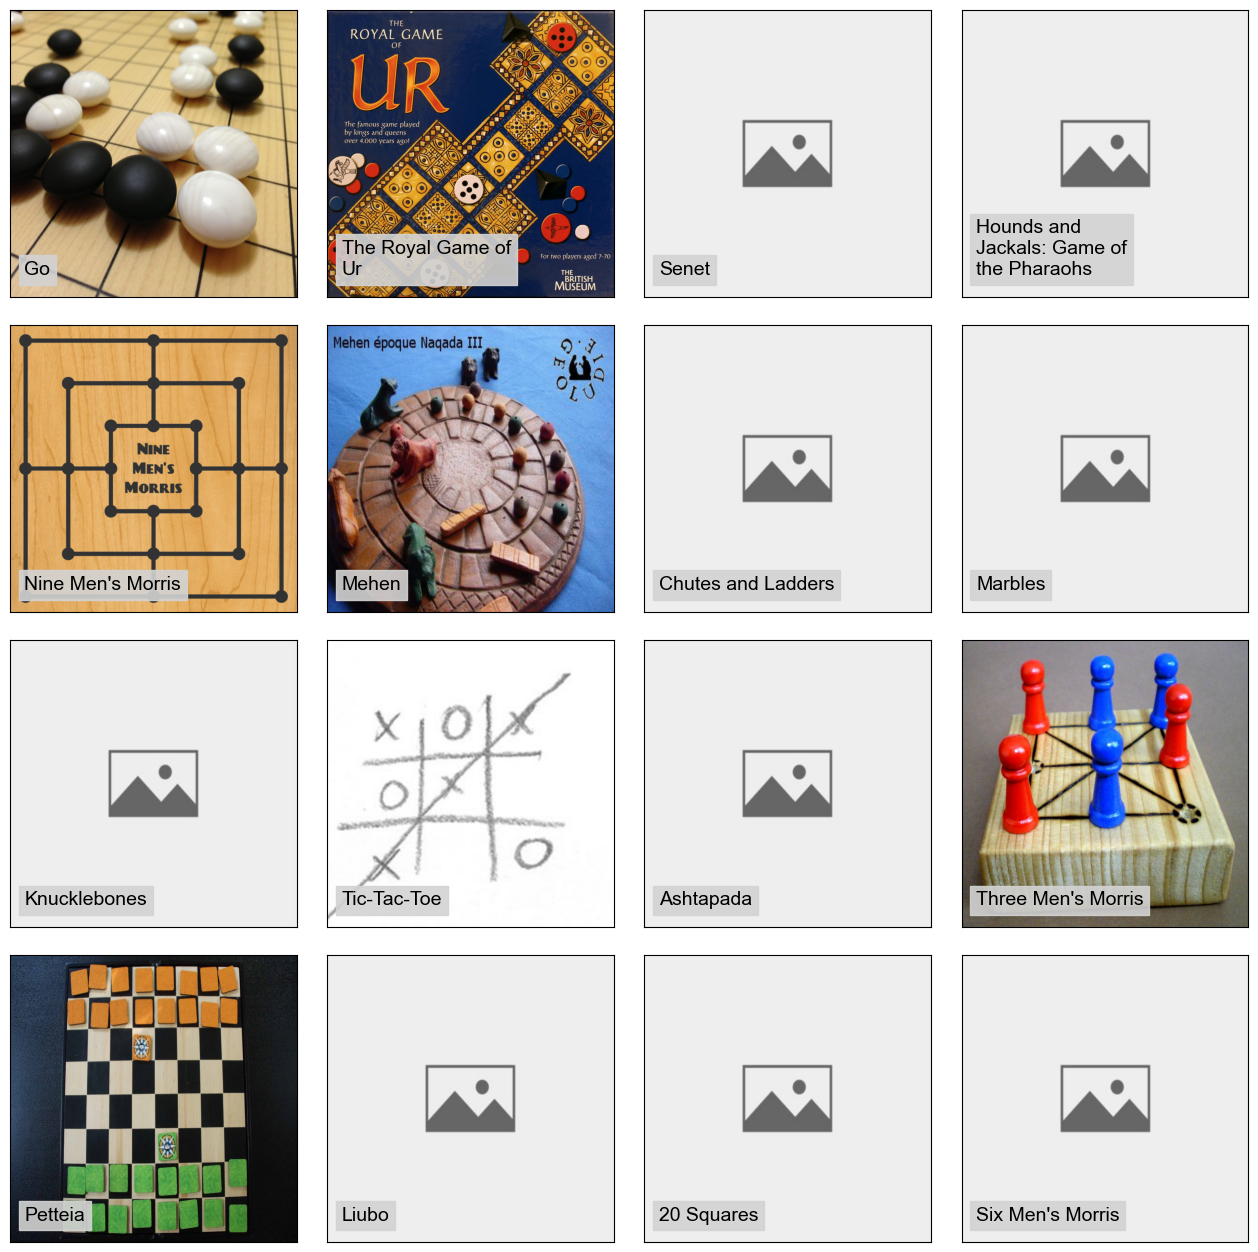

In [32]:
# Illustrate 8 of these games
neg_yr_id = neg_yr['bgg_id'].values[:16]
neg_yr_imgs = [ref_dicts['images'][i] for i in neg_yr_id]
subplot_images(neg_yr_imgs, neg_yr['name'].values[:16])

##### The conclusion is that most of the games which have the minus year are traditional board games that are dated. We are not trying to recommend such board games. As such, these games will be removed from our dataframe.

##### On that note, we also found out that there were still many traditional board games in the dataframe. The board gaming market experienced significant growth from the late 1990s [source]. "The Settlers of Catan" was one of the first Eurogames to achieve popularity outside of Europe. Therefore, we will filter our board games dated before the Year 1995.

In [34]:
# Remove dated board games from dataframe
df = df.loc[df['year']>=1995]

In [35]:
# Taking a look at some of the board games of year 2021 and beyond
future_yr = df.loc[df['year']>=2024]
print(f'There are {future_yr.shape[0]} such games.')
future_yr.sample(20, random_state=42)

There are 279 such games.


,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,...,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency
96943,320882,Fight Sequence,2025.0,NaN,130623,130621,46736,2.0,2.0,2.0,...,"22184,61206,65191,56352,8374,70948,61979,28857...",NaN,NaN,NaN,3.0,9.00000,0.816497,NaN,2.0000,NaN
111177,375365,Once Upon a Line,2024.0,NaN,"46868,127581","149669,144901,149681,149676,72101,149673,149774",45779,1.0,5.0,1.0,...,"22184,62475,8374,24281,72224,5666",NaN,NaN,15763.0,54.0,6.31864,3.865330,5.52079,2.7778,NaN
113120,383365,Roll-With-It: Fantasy Series,2024.0,NaN,128970,"129173,147902,67204",49421,1.0,1.0,1.0,...,"22184,8374,73596,76970,61977",NaN,NaN,NaN,2.0,5.50000,3.500000,NaN,NaN,NaN
111864,377991,Moon Bunny,2024.0,NaN,"126375,126374",NaN,45462,1.0,4.0,1.0,...,"22184,6507,8374",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113685,388334,Defend Megatropolis,2025.0,NaN,153064,NaN,54014,1.0,1.0,1.0,...,"22184,39912,8374,61977,17935",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113503,386760,Putin's War 2022,2024.0,NaN,1957,1957,570,2.0,2.0,2.0,...,58471,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110096,370317,Xorakus,2024.0,NaN,147905,147905,52399,1.0,5.0,1.0,...,"22184,8374",NaN,NaN,NaN,1.0,10.00000,NaN,NaN,NaN,NaN
113211,383880,Dungeon Chrono,2024.0,NaN,"151266,151267",NaN,51093,1.0,2.0,1.0,...,22184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113713,388476,Spectral,2024.0,NaN,110818,28024,48453,2.0,5.0,2.0,...,"22184,8374",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111948,378286,Lily Hop,2024.0,NaN,111681,132093,40091,2.0,4.0,2.0,...,"22184,8374",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


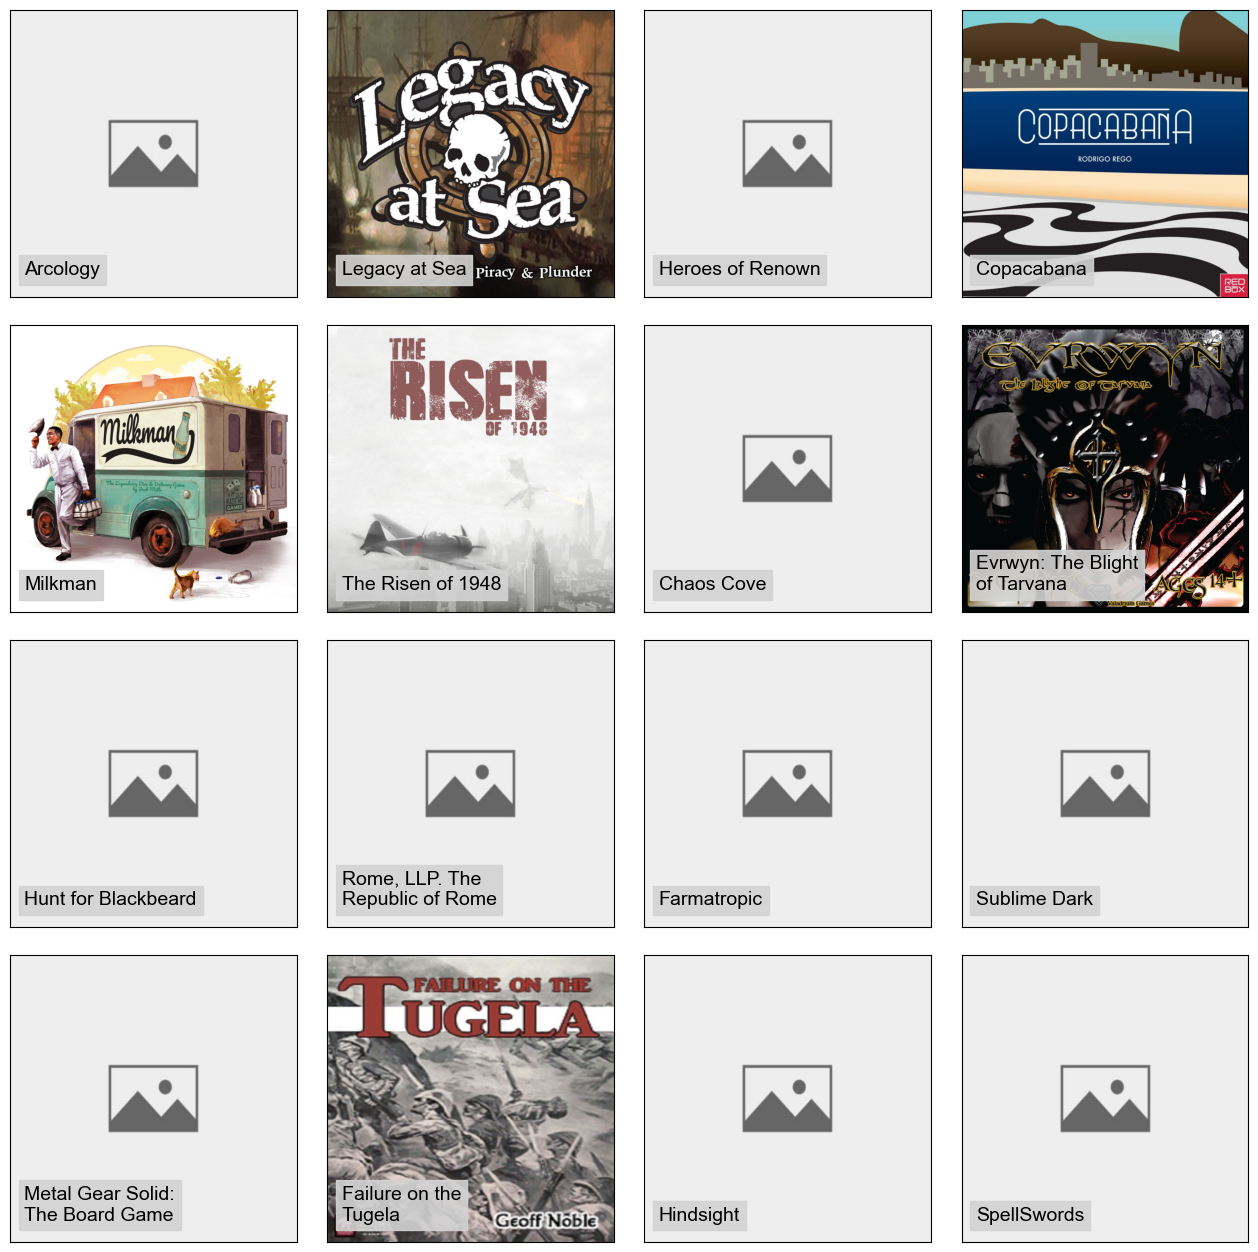

In [36]:
# Illustrate 8 of these games
future_yr_id = future_yr['bgg_id'].values[:16]
future_yr_imgs = [ref_dicts['images'][i] for i in future_yr_id]
subplot_images(future_yr_imgs, future_yr['name'].values[:16])

In [37]:
##### When we view these games on the BGG website, these games all do not have a rating yet, and most are missing information on the game types, categories, etc. Furthermore, there is always a chance that the publications may be delayed or not go through if it is crowd-funded on kickstarter and did not meet its pledge goals. Hence, we will not be keeping these games in our analysis. Since it is still January 2021, it is safe to remove all games from 2021 onwards.